<a href="https://colab.research.google.com/github/chhyyi/aiffel/blob/main/LMS/lms_exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXP7 Camera sticker app
This is exploration node of modulabs aiffel lms node exp7.

먼저 필요한 library들을 import합니다.
cv2는 openCV라고 하는 이미지 처리 라이브러리입니다. 2가 붙은 이유는 버전을 바꾸다가 어쩌다 그렇게 됐다고 합니다. dlib는 face detector를 사용하기 위해 씁니다.  face detector HOG(histogram of oriented gradients)와 SVM(Support Vector Machine을 사용한다고 하네요.)
또 이번에는 train을 시키는 것이 아니라 학습돼 있는 모델을 가져다 씁니다.

In [87]:
#lms code copied
import cv2
import dlib

import os
import matplotlib.pyplot as plt
import numpy as np

#print(cv2.__version__, dlib.__version__)
path = r'/content/drive/MyDrive/colabdata/modulabs/lms_exp7/'

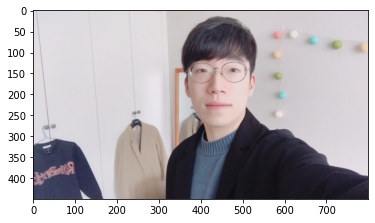

In [88]:
#lms code copied

#my_image_path=path+'IMG_0122.png'
my_image_path=path+'E-8-6.png'
#my_image_path=path+'newglass.png'
#my_image_path=path+'now.png'
#my_image_path=path+'faq.png'
img_bgr = cv2.imread(my_image_path, cv2.IMREAD_UNCHANGED)    # OpenCV를 이용해 lms에서 다운받은 이미지를 불러옵니다.
#알파 채널(투명색) 정보를 유지하기 위해 cv2.IMREAD_UNCHANGED 플래그를 붙이라고 합니다. 왜 붙이냐 하면 나중에 불러올 이미지는 4채널이라 크기가 안맞는다고 스티커 붙이기가 안돼서 그렇습니다.

img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다 

#이걸로 img_show, img_bgr, img_rgb 세개를 가지고 갑니다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb)
plt.show()

## frontal face detect
 IMG_0122.png는 제 사진이었지만 얼굴 인식에 실패했습니다. 안경이 너무 두꺼워서 그랬을까요? 기분이 별로 좋지는 않네요. 그런데 옛날 사진인 faq.png의 경우는 성공해서 기분이 좋지 않네요. 참 묘한 일입니다.

In [89]:
#lms code copied
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

rectangles[[(345, 98) (531, 284)]]


rectangles[[(345, 98) (531, 284)]]


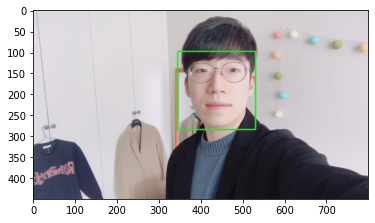

In [90]:
#lms code copied
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## import trained model
google colab에서 진행하는 관계로 다음과 같이 명령어를 수행하였습니다. mv로 옮긴 경로는 path에 저장된 바로 그 경로입니다.
```shell
!wget http://dlib.net/files/hape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat /content/drive/MyDrive/colabdata/modulabs/lms_exp7/shape_predictor_68_face_landmarks.dat
```
(lms code copied)  


이를 통해 파일을 다운받아 google drive에 옮기는데 성공했습니다. 느낌표는 jupyter notebook에서 shell 명령어를 넣을때 씁니다. 참고로 첫 줄의 출력은 이러했습니다. (나머지 줄은 따로 출력이 없습니다)
```shell
--2022-08-15 11:45:06--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  56.9MB/s    in 1.1s    

2022-08-15 11:45:08 (56.9 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]
```

In [91]:
#lms code copied

model_path = path+'shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [92]:
#lms code copied

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


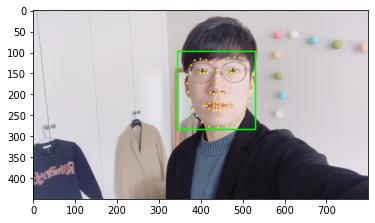

In [93]:
#lms code copied
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 붙일 곳 정하기
적당히 각 지점들의 번호를 보고 정했습니다.

In [94]:
#lms code copied
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    
    #코 끝과 그 위의 콧등인 30 사이의 중간위치를 쓰도록 하겠습니다.
    x = (landmark[30][0]+landmark[33][0])//2 
    y = (landmark[30][1]+landmark[33][1])//2
    w = dlib_rect.width()

    #height는 그냥 node 7-6의 점 번호를 참고해 적당해 보이는 것들을 가지고 했습니다.
    h = landmark[57][1]-landmark[28][1]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(437, 182)
(x,y) : (437,191)
(w,h) : (187,82)


In [95]:
#lms code copied
sticker_path = path+'catsticker.png'
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) # 스티커 이미지를 불러옵니다
#알파 채널(투명색) 데이터를 유지하기 위해서는 IMREAD_UNCHANGED 플래그를 붙이라고 하네요.

img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(82, 187, 4)


In [96]:
#lms code copied
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,109)


이 경우 bounding box를 벗어나진 않을 수도 있지만 코가 비대칭이면 벗어나므로 crop을 적용합니다.

In [97]:
#lms code copied
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,109)


## 스티커 붙이기

img_show[from:to], np.where() 를 이용해 이미지를 적용합니다. from:to는 그냥 array index의 slice 같네요.

이유는 모르겠지만 제가 다운받은 png이미지들은 원래 투명한, alpha값이 0인 부분이 255, 255, 255으로 들어오는 것 같으니 img_sticker==0 대신 img_sticker==255로 고쳤습니다. 하지만 alpha값을 이용한 아래 코드를 쓰기로 해서 더 이상 안씁니다.

```python
#lms code copied
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
```

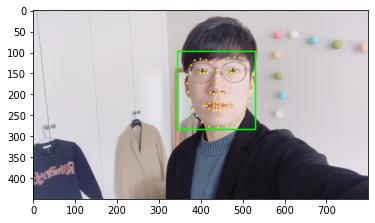

In [98]:
#lms code copied
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

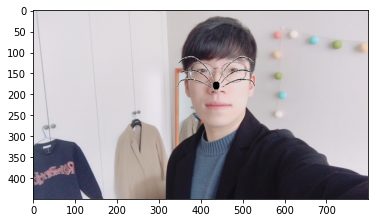

In [99]:
#lms code copied
img_temp=img_bgr.copy()
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_temp[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))
plt.show()

## alpha 채널을 이용한 스티커 붙이기:
alpha 채널을 읽어오긴 했는데 사실 쓰이지는 않고 있습니다. 그래서 원래 이미지에서는 코 중앙부분이 살짝 투명한데 그냥 검게 나왔어요. 알파 채널 array를 분리해서 일반적으로 우리가 생각하는 이미지 레이어에서 스티커를 상위 레이어에 둔 것처럼 보이게 해봅시다. alpha 채널은 0이면 완전히 투명하고, 255이면 완전히 불투명합니다. 즉 255이면 sticker만. 0이면 sticker_area값만 출력하면 됩니다. 이것을 다시 선형 fitting했다고 생각하면,
```python
(sticker_alpha//255)*img_sticker+(1-sticker_alpha//255)*sticker_area
```
이렇게 각 채널&픽셀에서의 값을 계산하면 되겠습니다.

In [100]:
sticker_alpha=np.array([img_sticker[:,:,3],img_sticker[:,:,3],img_sticker[:,:,3],img_sticker[:,:,3]])
print(sticker_alpha.shape)
sticker_alpha=sticker_alpha.swapaxes(0, 1)
print(sticker_alpha.shape)
sticker_alpha=sticker_alpha.swapaxes(1, 2)
print(sticker_alpha.shape)

(4, 82, 187)
(82, 4, 187)
(82, 187, 4)


In [101]:
print(img_sticker.shape, sticker_alpha.shape, img_bgr.shape, sticker_area.shape)

(82, 187, 4) (82, 187, 4) (450, 800, 4) (82, 187, 4)


### handling numpy.ndarray with operators
이거를 이제 픽셀별로 계산하면 이렇게 되는데, numpy.ndarray이기 때문에 자동으로 shape같은 array끼리 연산자를 쓰면 각 index의 값들을 계산해줍니다. 물론 np.multiply, np.divide 등을 써서 이렇게 해도 됩니다.
```python
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    (np.multiply(np.divide(sticker_alpha,255),img_sticker)+np.multiply(np.divide(np.substract(255,sticker_alpha),255),sticker_area)).astype(np.uint8)


```

In [102]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    (((sticker_alpha/255)*img_sticker)+((255-sticker_alpha)/255)*sticker_area).astype(np.uint8)



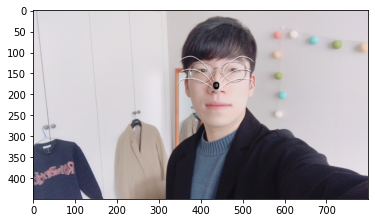

In [103]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

조금 자연스러워 진 것 같기도 합니다. 아무튼 원하는대로 되어서 뿌듯하네요. 수염이 너무 위로 올라가서 눈을 다 덮고 있어서 괴상하지만 그건 제가 대충 만든 스티커 이미지의 문제인 것 같습니다.

## 다양한 사진에 적용해보기!

그전에 이 과정을 반복하기 편하게 좀 정리해봅시다. 일단 4개의 사진을 더 가져와 보았습니다.

In [111]:
#paths=[path+'E-8-6.png',path+'newglass.png',path+'faq.png']
paths=[path+'E-8-6.png',path+'newglass.png',path+'faq.png',path+'now.png']
#img_bgrs = list(map((lambda x:cv2.imread(x, cv2.IMREAD_UNCHANGED)),paths))


In [105]:
#img_rgbs = list(map((lambda x:cv2.cvtColor(x, cv2.COLOR_BGR2RGB)),img_bgrs))

#for i in img_rgbs:
#    plt.imshow(i)
#    plt.show()
#dlib_rectss = list(map((lambda x: detector_hog(x, 1)), img_rgbs))

그런데 이렇게 하나하나 lambda 하느니 그냥 function 하나 정의하는 것이 훨씬 낫겠습니다

(437, 182)
(x,y) : (437,191)
(w,h) : (187,82)
(x,y) : (437,191)
(w,h) : (187,82)
(82, 187, 4) (82, 187, 4) (82, 187, 4)


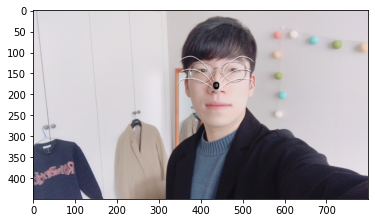

In [108]:
def attach_sticker(path_):
    bgr = cv2.imread(path_, cv2.IMREAD_UNCHANGED)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    rgb_bk=rgb.copy()
    dlib_rectss = detector_hog(rgb, 1)
    list_landmarkss = []

    for dlib_rect in dlib_rectss:
        points = landmark_predictor(rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarkss.append(list_points)
    
    for dlib_rect, landmark in zip(dlib_rectss, list_landmarkss):
        print (landmark[30]) # 코의 index는 30 입니다
        
        #코 끝과 그 위의 콧등인 30 사이의 중간위치를 쓰도록 하겠습니다.
        x = (landmark[30][0]+landmark[33][0])//2 
        y = (landmark[30][1]+landmark[33][1])//2
        w = dlib_rect.width()

        #height는 그냥 node 7-6의 점 번호를 참고해 적당해 보이는 것들을 가지고 했습니다.
        h = landmark[57][1]-landmark[28][1]
        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))
        
    sticker = cv2.resize(img_sticker, (w,h))
    sticker_alpha_temp = cv2.resize(sticker_alpha, (w,h))
    refined_x = x - w // 2
    refined_y = y - h
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    sticker_area = bgr[refined_y:refined_y +sticker.shape[0], refined_x:refined_x+sticker.shape[1]]

    print(sticker_alpha_temp.shape, sticker_area.shape,sticker.shape)

    bgr[refined_y:refined_y +sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = \
    (((sticker_alpha_temp/255)*sticker)+((255-sticker_alpha_temp)/255)*sticker_area).astype(np.uint8)

    plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
    plt.show()
attach_sticker(paths[0])


(750, 1041)
(x,y) : (750,1085)
(w,h) : (800,396)
(x,y) : (750,1085)
(w,h) : (800,396)
(396, 800, 4) (396, 800, 4) (396, 800, 4)


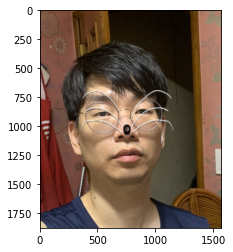

(493, 168)
(x,y) : (493,174)
(w,h) : (108,55)
(x,y) : (493,174)
(w,h) : (108,55)
(55, 108, 4) (55, 108, 4) (55, 108, 4)


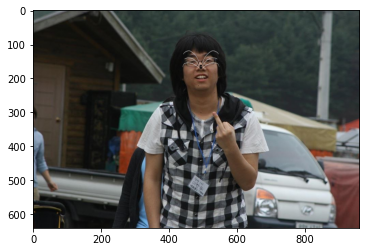

In [107]:
attach_sticker(paths[1])
attach_sticker(paths[2])

In [112]:
attach_sticker(paths[3])

UnboundLocalError: ignored

# 결과 분석(문제점 찾아보기)
- 그렇게 많은 사진을 넣어보지 않았지만, 마스크 썼다고 인식 못하는 것을 문제라고 할 수 있을까? 이게 에러가 나온 paths[3]의 경우이다. 정하기 쉽지 않은 부분이다. 하지만 요즘 야외 사진은 대부분 마스크를 쓰고 찍지 않나?
- 얼굴 사진과 스티커의 상태가 영 좋지 않다. 그런데 그건 뭐 어쩔 수 없지 않을까...